<a href="https://colab.research.google.com/github/cm-smith/MIMIC-Multitask-Learner/blob/main/MIMIC_Multitask_Learner_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/Othercomputers/My MacBook Pro/MIMIC_DL_Project/MIMIC-Multitask-Learner')

In [3]:
ls

data/        README.md  Tutorial__Advanced_Colab_Development_Environment.pdf
__init__.py  src/


In [4]:
#@title Run this code cell to import your project directory into Colab
import os, sys, time
import os.path as op

#@markdown Enter your project details:
project_path = "/content/drive/Othercomputers/My MacBook Pro/MIMIC_DL_Project/MIMIC-Multitask-Learner" #@param {type: "string"}
project_name = project_path.split("/")[-1]

#@markdown Note: you can find the path to your project folder on Google Drive by 
#@markdown searching in the Colab file system under /content/drive/ (link active once you mount your Google Drive) 
#@markdown and most likely the 'Othercomputers/' subfolder (depending on your specific
#@markdown Google Drive setup).

if not os.path.exists(project_path):
  print(f"Colab could not access the project_path you provided: {project_path}\n \
  Make sure that you have mounted your Google Drive and provide an absolute path to your project folder.")
  sys.exit()

# copy project contents into working dir
%cp -R "{project_path}" /content/ &> /dev/null

requirements_filename = "" #@param {type: "string"}

#@markdown If you do not want any `pip install` to be executed by this cell,
#@markdown leave `requirements_filename` blank.

python_version = "3.9" #@param ["3.7", "3.8", "3.9", "3.10"]

#@markdown You can ensure that Colab executes a script with your desired version
#@markdown of Python by specifying the version number in the command, such as: `!python3.9 your_script.py`

# Add a Google Drive path to project dependencies
dependencies_path = f'/content/{project_name}_packages_symlink'
if not os.path.exists(dependencies_path):
  package_src_path = f"/content/drive/MyDrive/{project_name}_packages"

  if not os.path.exists(package_src_path):
    %mkdir "{package_src_path}"

  os.symlink(package_src_path, dependencies_path)
  sys.path.insert(0, dependencies_path)

# cd into the Colab copy of the project directory
colab_project_path = op.join("/content/", f"{project_name}")
%cd -q {colab_project_path}

# install the user's Python version
print("\nInstalling user's Python version...", end =" ")
!apt-get -qq update
!apt-get -qq install python$python_version > /dev/null
print("done\n")

# Updates or installs any packages that aren't up-to-date with requirements.txt
if requirements_filename != "":
  print("Installing user's Python requirements...", end=" ")
  %pip -r {requirements_filename} --target=$dependencies_path &> /dev/null
  print("done\n")

print("Verify the desired Python version prints below:")
print("> ", end="") 
!python$python_version --version

print("\nAnd verify that you can see your project directory's contents with: %ls")
print("> ", end="")
%ls


Installing user's Python version... done

Verify the desired Python version prints below:
> Python 3.9.12

And verify that you can see your project directory's contents with: %ls
> data/        README.md  Tutorial__Advanced_Colab_Development_Environment.pdf
__init__.py  src/


In [5]:
!python --version

Python 3.7.13


In [6]:
!ls ./data

CHARTEVENTS_reduced_24_hour_blocks_plus_admissions_plus_patients_plus_scripts_plus_icds_plus_notes.csv


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv("data/CHARTEVENTS_reduced_24_hour_blocks_plus_admissions_plus_patients_plus_scripts_plus_icds_plus_notes.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (150,152) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
## display all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
df.shape

(628391, 235)

In [10]:
df.columns.tolist()

['BUN',
 'HDL',
 'INR',
 'Inspired O2 Fraction',
 'LDL',
 'PEEP Set',
 'PTT',
 'RBCs',
 'WBCs',
 'anion gap',
 'atypical lymphocytes',
 'bands',
 'basophils',
 'blood culture',
 'central venous pressure',
 'chloride',
 'creatinine',
 'daily weight',
 'diabetes',
 'diastolic',
 'eosinophils',
 'glucose',
 'heart rate',
 'hemocrit',
 'hemoglobin',
 'lymphocytes',
 'monocytes',
 'neutrophils',
 'platelets',
 'polymorphonuclear leukocytes',
 'potassium_x',
 'pulse oximetry',
 'respiratory rate',
 'sodium',
 'systolic',
 'temperature (F)',
 'tidal volume',
 'tobacco',
 'triglycerides',
 'troponin',
 'BUN_std',
 'HDL_std',
 'INR_std',
 'Inspired O2 Fraction_std',
 'LDL_std',
 'PEEP Set_std',
 'PTT_std',
 'RBCs_std',
 'WBCs_std',
 'anion gap_std',
 'atypical lymphocytes_std',
 'bands_std',
 'basophils_std',
 'central venous pressure_std',
 'chloride_std',
 'creatinine_std',
 'diastolic_std',
 'eosinophils_std',
 'glucose_std',
 'heart rate_std',
 'hemocrit_std',
 'hemoglobin_std',
 'lymphocyt

## 0. Data prepocessing


*   Define outcomes (MI and Sepsis for now)
*   Keep patients who stayed in ICU >= 2 days
*   Create baseline data (select 1st day per patient)
*   Remove those with age, number of days in ICU > 99% quartile
*   Feature selection for MI (N = 221)
*   Feature selection for Sepsis (N = 225)
*   Split train and test data (70% train, 30% test)
    *   Ongoing (TBD): need to add a validation set






In [25]:
## define outcomes

### 1. MI
df['MI'] = ((df['troponin'] > 0.4) & (df['CKD'] == 0)).apply(lambda x: int(x))
df['MI'] .value_counts()

### 2. Sepsis
def wbc_crit(x):
  if (x > 12 or x < 4) and x != 0:
    return 1
  else:
    return 0

def temp_crit(x):
  if (x > 100.4 or x < 96.8) and x != 0:
    return 1
  else:
    return 0

df['hr_sepsis'] = df['heart rate'].apply(lambda x: 1 if x > 90 else 0)
df['respiratory rate_sepsis'] = df['respiratory rate'].apply(lambda x: 1 if x>20 else 0)
df['wbc_sepsis'] = df['WBCs'].apply(wbc_crit) 
df['temperature f_sepsis'] = df['temperature (F)'].apply(temp_crit) 
df['sepsis_points'] = (df['hr_sepsis'] + df['respiratory rate_sepsis'] 
                          + df['wbc_sepsis'] + df['temperature f_sepsis'])
df['Sepsis'] = ((df['sepsis_points'] >= 2) & (df['Infection'] == 1)).apply(lambda x: int(x))
df['Sepsis'].fillna(0)
df['Sepsis'].value_counts()
df[['Sepsis']].head()

0    624300
1      4091
Name: MI, dtype: int64

0         0
1         0
2         1
3         0
4         0
         ..
628386    0
628387    0
628388    0
628389    0
628390    0
Name: Sepsis, Length: 628391, dtype: int64

0    536479
1     91912
Name: Sepsis, dtype: int64

,Sepsis
0,0
1,0
2,1
3,0
4,0


In [12]:
# The data is at the HADM_ID/HADMID_DAY-level
assert sum(df.groupby(['HADM_ID', 'HADMID_DAY']).size().values) == df.shape[0]

In [13]:
day_counts = df.groupby(['HADM_ID']).size().values
print("Mean and SD day count: (%.2f, %.2f)" % (day_counts.mean(), day_counts.std()))
print("Quantiles for day count:")
quantile_cuts = np.array([0.,0.01,0.25,0.5,0.75,0.99,1.0])
dict(zip(quantile_cuts, np.quantile(day_counts, quantile_cuts)))

Mean and SD day count: (10.83, 25.92)
Quantiles for day count:


{0.0: 1.0, 0.01: 1.0, 0.25: 4.0, 0.5: 7.0, 0.75: 12.0, 0.99: 64.0, 1.0: 3660.0}

In [26]:
from re import M
# Number of unique patients
n = len(pd.unique(df['HADM_ID']))
n
# keep patients with at least 2 days
df['day_counts'] = df.groupby(['HADM_ID'])["HADM_ID"].transform("count")
#df[['HADM_ID','HADMID_DAY','day_counts']].head()

m = df['day_counts'].ge(2).groupby(df['HADM_ID']).transform('all')
df_s = df[m]
#df_s[['HADM_ID','HADMID_DAY','day_counts']].head()
df_s.shape

# Number of unique patients left
n = len(pd.unique(df_s['HADM_ID']))
n

# select first obs per patient as baseline 
df_bl = df_s.groupby('HADM_ID').first().reset_index()

# check number of days (min shoube be > 1)
df_bl[['day_counts']].describe()

58034

(624949, 243)

54592

,day_counts
count,54592.00000
mean,11.44763
std,26.60095
min,2.00000
25%,5.00000
50%,8.00000
75%,13.00000
max,3660.00000


In [27]:
### delete those with age, day_counts >= 99% quartiles
df_bl = df_bl[df_bl.AGE < df_bl.AGE.quantile(.99)]
df_bl = df_bl[df_bl.day_counts < df_bl.day_counts.quantile(.99)]
df_bl[['day_counts']].describe()

,day_counts
count,51543.000000
mean,10.492463
std,9.435282
min,2.000000
25%,5.000000
50%,7.000000
75%,13.000000
max,66.000000


In [28]:
## convert admission time format
df_bl['ADMITTIME'] = pd.to_datetime(df_bl['ADMITTIME'],errors='coerce')
df_bl[['ADMITTIME']].head()

df_bl['ADMITTIME'] = df_bl[('ADMITTIME')].values.astype("float64")

,ADMITTIME
0,2117-09-11 11:46:00
1,2150-04-17 15:34:00
2,2108-04-06 15:49:00
3,2145-03-31 05:33:00
4,2162-05-16 15:56:00


In [29]:
### split train and test set
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_bl, test_size=0.3)
train_data.head()
train_data.shape

,HADM_ID,BUN,HDL,INR,Inspired O2 Fraction,LDL,PEEP Set,PTT,RBCs,WBCs,...,Infection,ct_angio,MI,hr_sepsis,respiratory rate_sepsis,wbc_sepsis,temperature f_sepsis,sepsis_points,Sepsis,day_counts
9473,117206,25.0,41.0,15.2,50.0,81.0,5.0,51.10,3.62,13.2,...,1,1,0,1,0,1,0,2,1,9
35001,164203,35.5,41.0,14.9,50.0,81.0,5.0,32.40,3.82,6.6,...,1,1,0,1,1,0,0,2,1,9
44612,181631,23.0,41.0,15.3,50.0,81.0,5.0,32.40,3.39,10.9,...,1,1,0,1,1,0,1,3,1,10
41618,176189,22.0,41.0,13.7,50.0,81.0,5.0,24.90,3.89,13.5,...,1,1,0,0,0,1,0,1,0,6
18704,134275,23.0,41.0,14.8,50.0,81.0,5.0,39.25,3.39,14.2,...,1,1,0,0,1,1,0,2,1,5


(36080, 243)

In [30]:
## feature selection

### 1. feature for MI (221)
drop = ['ct_angio', 'troponin', 'troponin_std', 'troponin_min', 'troponin_max', 'Infection','CKD','hr_sepsis',
        'respiratory rate_sepsis','wbc_sepsis','temperature f_sepsis','sepsis_points','vancomycin',
        'HADM_ID', 'SUBJECT_ID','YOB','ADMITYEAR','DOB','Sepsis','day_counts','HADMID_DAY']
tmp =df_bl.drop(drop, axis=1)
MI_features = list(tmp.columns.values)
MI_features.remove('MI')
X_MI_train = train_data[MI_features]
y_MI_train = train_data['MI']
X_MI_val = test_data[MI_features]
y_MI_val = test_data['MI']

X_MI_train.shape
y_MI_train.shape

X_MI_val.shape
y_MI_val.shape

### 2. feature for sepsis (225)
drop = ['ct_angio', 'Infection','CKD','hr_sepsis',
        'respiratory rate_sepsis','wbc_sepsis','temperature f_sepsis','sepsis_points','vancomycin',
        'HADM_ID', 'SUBJECT_ID','YOB','ADMITYEAR','DOB','MI','day_counts','HADMID_DAY']
tmp =df_bl.drop(drop, axis=1)
sepsis_features = list(tmp.columns.values)
sepsis_features.remove('Sepsis')
X_sepsis_train = train_data[sepsis_features]
y_sepsis_train = train_data['Sepsis']
X_sepsis_val = test_data[sepsis_features]
y_sepsis_val = test_data['Sepsis']

X_sepsis_train.shape
y_sepsis_train.shape

X_sepsis_val.shape
y_sepsis_val.shape

(36080, 221)

(36080,)

(15463, 221)

(15463,)

(36080, 225)

(36080,)

(15463, 225)

(15463,)

In [19]:
X_MI_train.columns.tolist()

['BUN',
 'HDL',
 'INR',
 'Inspired O2 Fraction',
 'LDL',
 'PEEP Set',
 'PTT',
 'RBCs',
 'WBCs',
 'anion gap',
 'atypical lymphocytes',
 'bands',
 'basophils',
 'blood culture',
 'central venous pressure',
 'chloride',
 'creatinine',
 'daily weight',
 'diabetes',
 'diastolic',
 'eosinophils',
 'glucose',
 'heart rate',
 'hemocrit',
 'hemoglobin',
 'lymphocytes',
 'monocytes',
 'neutrophils',
 'platelets',
 'polymorphonuclear leukocytes',
 'potassium_x',
 'pulse oximetry',
 'respiratory rate',
 'sodium',
 'systolic',
 'temperature (F)',
 'tidal volume',
 'tobacco',
 'triglycerides',
 'BUN_std',
 'HDL_std',
 'INR_std',
 'Inspired O2 Fraction_std',
 'LDL_std',
 'PEEP Set_std',
 'PTT_std',
 'RBCs_std',
 'WBCs_std',
 'anion gap_std',
 'atypical lymphocytes_std',
 'bands_std',
 'basophils_std',
 'central venous pressure_std',
 'chloride_std',
 'creatinine_std',
 'diastolic_std',
 'eosinophils_std',
 'glucose_std',
 'heart rate_std',
 'hemocrit_std',
 'hemoglobin_std',
 'lymphocytes_std',
 'mo

## 1. Data summary

### 1.1 Number of patients in total; number of patients in train and test

In [31]:
print(df_bl.shape[0]) ## total number of patients

print(train_data.shape[0]) ## total number of patients in train set

print(test_data.shape[0])  ## total number of patients in test set

51543
36080
15463


### 1.2 Number/percentages of outcomes

In [32]:
### 1. MI
df_bl['MI'].value_counts()
df_bl['MI'].value_counts(normalize = True)*100

train_data['MI'].value_counts()
train_data['MI'].value_counts(normalize = True)*100

test_data['MI'].value_counts()
test_data['MI'].value_counts(normalize = True)*100

### 2. Sepsis
df_bl['Sepsis'].value_counts()
df_bl['Sepsis'].value_counts(normalize = True)*100

train_data['Sepsis'].value_counts()
train_data['Sepsis'].value_counts(normalize = True)*100

test_data['Sepsis'].value_counts()
test_data['Sepsis'].value_counts(normalize = True)*100



0    50434
1     1109
Name: MI, dtype: int64

0    97.848398
1     2.151602
Name: MI, dtype: float64

0    35275
1      805
Name: MI, dtype: int64

0    97.768847
1     2.231153
Name: MI, dtype: float64

0    15159
1      304
Name: MI, dtype: int64

0    98.034017
1     1.965983
Name: MI, dtype: float64

0    38350
1    13193
Name: Sepsis, dtype: int64

0    74.403896
1    25.596104
Name: Sepsis, dtype: float64

0    26825
1     9255
Name: Sepsis, dtype: int64

0    74.34867
1    25.65133
Name: Sepsis, dtype: float64

0    11525
1     3938
Name: Sepsis, dtype: int64

0    74.532756
1    25.467244
Name: Sepsis, dtype: float64

### 1.3 Average age, percentage of gender and race

In [37]:
df_bl['AGE'].describe()
df_bl['M'].value_counts()
df_bl['M'].value_counts(normalize=True) * 100
df_bl['BLACK'].value_counts()
df_bl['BLACK'].value_counts(normalize=True) * 100

train_data['AGE'].describe()
train_data['M'].value_counts() 
train_data['M'].value_counts(normalize=True) * 100
train_data['BLACK'].value_counts()
train_data['BLACK'].value_counts(normalize=True) * 100

test_data['AGE'].describe()
test_data['M'].value_counts() 
test_data['M'].value_counts(normalize=True) * 100
test_data['BLACK'].value_counts()
test_data['BLACK'].value_counts(normalize=True) * 100

count    51543.000000
mean        55.488175
std         25.256770
min          0.000000
25%         45.000000
50%         62.000000
75%         75.000000
max         89.000000
Name: AGE, dtype: float64

1.0    28691
0.0    22852
Name: M, dtype: int64

1.0    55.664203
0.0    44.335797
Name: M, dtype: float64

0.0    46532
1.0     5011
Name: BLACK, dtype: int64

0.0    90.27802
1.0     9.72198
Name: BLACK, dtype: float64

count    36080.000000
mean        55.525305
std         25.257831
min          0.000000
25%         45.000000
50%         62.000000
75%         75.000000
max         89.000000
Name: AGE, dtype: float64

1.0    20071
0.0    16009
Name: M, dtype: int64

1.0    55.629157
0.0    44.370843
Name: M, dtype: float64

0.0    32557
1.0     3523
Name: BLACK, dtype: int64

0.0    90.235588
1.0     9.764412
Name: BLACK, dtype: float64

count    15463.000000
mean        55.401539
std         25.254900
min          0.000000
25%         45.000000
50%         61.000000
75%         75.000000
max         89.000000
Name: AGE, dtype: float64

1.0    8620
0.0    6843
Name: M, dtype: int64

1.0    55.745974
0.0    44.254026
Name: M, dtype: float64

0.0    13975
1.0     1488
Name: BLACK, dtype: int64

0.0    90.377029
1.0     9.622971
Name: BLACK, dtype: float64

### 1.4 Distribution of number of days in ICU

count    51543.000000
mean        10.492463
std          9.435282
min          2.000000
25%          5.000000
50%          7.000000
75%         13.000000
max         66.000000
Name: day_counts, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff98c0b7950>]],
      dtype=object)

count    36080.000000
mean        10.521037
std          9.464111
min          2.000000
25%          5.000000
50%          8.000000
75%         13.000000
max         66.000000
Name: day_counts, dtype: float64

count    15463.000000
mean        10.425791
std          9.367635
min          2.000000
25%          5.000000
50%          7.000000
75%         13.000000
max         66.000000
Name: day_counts, dtype: float64

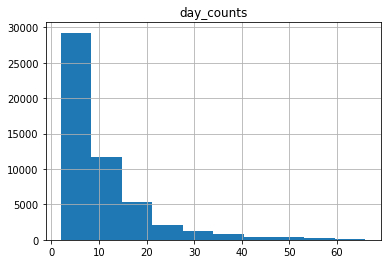

In [34]:
df_bl['day_counts'].describe()
df_bl[['day_counts']].hist()

train_data['day_counts'].describe()
test_data['day_counts'].describe()


## 2. Baseline model
### 2.1 Logistic regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

### 1. MI

LogisticMod = LogisticRegression(solver = 'liblinear')
LogisticMod.fit(X_MI_train, y_MI_train )
#acc_train = LogisticMod.score(X_MI_train, y_MI_train)
#acc_val = LogisticMod.score(X_MI_val, y_MI_val)

## training set accuracy
y_MI_train_hat = LogisticMod.predict(X_MI_train)
acc_MI_train = accuracy_score(y_MI_train, y_MI_train_hat)
roc_MI_train = roc_auc_score(y_MI_train, y_MI_train_hat)

## validation set accuracy
y_MI_val_hat = LogisticMod.predict(X_MI_val)
acc_MI_val = accuracy_score(y_MI_val, y_MI_val_hat)
roc_MI_val = roc_auc_score(y_MI_val, y_MI_val_hat)

print("-"*10 + " Training Set (MI) " + "-"*10)
print(f'Accuracy: {acc_MI_train}')
print(f'AUROC: {roc_MI_train}')

print("-"*10 + " Validation Set (MI) " + "-"*10)
print(f'Accuracy: {acc_MI_val}')
print(f'AUROC: {roc_MI_val}')

### 2. Sepsis 
LogisticMod = LogisticRegression(solver = 'liblinear')
LogisticMod.fit(X_sepsis_train, y_sepsis_train )
#acc_train = LogisticMod.score(X_sepsis_train, y_sepsis_train)
#acc_val = LogisticMod.score(X_sepsis_val, y_sepsis_val)

## training set accuracy
y_sepsis_train_hat = LogisticMod.predict(X_sepsis_train)
acc_sepsis_train = accuracy_score(y_sepsis_train, y_sepsis_train_hat)
roc_sepsis_train = roc_auc_score(y_sepsis_train, y_sepsis_train_hat)

## validation set accuracy
y_sepsis_val_hat = LogisticMod.predict(X_sepsis_val)
acc_sepsis_val = accuracy_score(y_sepsis_val, y_sepsis_val_hat)
roc_sepsis_val = roc_auc_score(y_sepsis_val, y_sepsis_val_hat)

print("-"*10 + " Training Set (Sepsis) " + "-"*10)
print(f'Accuracy: {acc_sepsis_train}')
print(f'AUROC: {roc_sepsis_train}')

print("-"*10 + " Validation Set (Sepsis) " + "-"*10)
print(f'Accuracy: {acc_sepsis_val}')
print(f'AUROC: {roc_sepsis_val}')

LogisticRegression(solver='liblinear')

---------- Training Set (MI) ----------
Accuracy: 0.9775221729490022
AUROC: 0.4999149539333806
---------- Validation Set (MI) ----------
Accuracy: 0.9802108258423333
AUROC: 0.4999340325879016


LogisticRegression(solver='liblinear')

---------- Training Set (Sepsis) ----------
Accuracy: 0.743320399113082
AUROC: 0.49988816402609504
---------- Validation Set (Sepsis) ----------
Accuracy: 0.7451982150940956
AUROC: 0.4999132321041215


### 2.2 Multi-layer neural network
**Accuracies of both outcomes does not improve when N_EPOCHS > 2**

In [42]:
# Train a multi-layer neural network using Keras

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

N_EPOCHS = 10 # performance doesn't improve after N_POCHS>2
BATCH_SIZE = 30 # Decide on the batch size 

### 2.2.1 MI

In [59]:
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import metrics

## Define the model
model = Sequential()
## Your model specification goes below
num_features = X_MI_train.shape[1]

model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=num_features, name='hidden_layer'))
model.add(Dense(units=1, activation='sigmoid', name='output_layer')) 

## After you have specified the model, compile it with an appropriate loss function and optimizer
opt = SGD(learning_rate=0.1)

METRICS = [
      metrics.BinaryAccuracy(name='accuracy'),
      #metrics.AUC(name='auc'),
]

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=METRICS)

model.summary()
## Now fit the model with a call to model.fit()
history = model.fit(x=X_MI_train, 
         y=y_MI_train,
         validation_data = (X_MI_val, y_MI_val),
         batch_size=BATCH_SIZE,
         epochs=N_EPOCHS)

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 32)                7104      
                                                                 
 output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 7,137
Trainable params: 7,137
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1203/1203 [==============================] - 6s 4ms/step - loss: nan - accuracy: 0.9769 - val_loss: nan - val_accuracy: 0.9803
Epoch 2/10
1203/1203 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.9777 - val_loss: nan - val_accuracy: 0.9803
Epoch 3/10
1203/1203 [==============================] - 4s 4ms/step - loss: nan - accuracy: 0.9777 - val_loss: nan - val_accuracy: 0.9803
Epoch 4/10
1203/1203 [===========

### 2.2 Sepsis

In [ ]:
from pyparsing.core import Opt
## Define the model
model = Sequential()
## Your model specification goes below
num_features = X_sepsis_train.shape[1]

## add more layers/dropout didn't improve accuracy, performance didn't improve after EPOCH > 2
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=num_features, name='hidden_layer'))
model.add(Dense(units=1, activation='sigmoid', name='output_layer')) 

## After you have specified the model, compile it with an appropriate loss function and optimizer
opt = SGD(learning_rate=0.1)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


## Now fit the model with a call to model.fit()
history = model.fit(x=X_sepsis_train, 
         y=y_sepsis_train,
         validation_data = (X_sepsis_val, y_sepsis_val),
         batch_size=BATCH_SIZE,
         epochs=N_EPOCHS)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 32)                7232      
                                                                 
 output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 7,265
Trainable params: 7,265
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1203/1203 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.7431 - val_loss: nan - val_accuracy: 0.7455
Epoch 2/10
1203/1203 [==============================] - 4s 4ms/step - loss: nan - accuracy: 0.7434 - val_loss: nan - val_accuracy: 0.7455
Epoch 3/10
1203/1203 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.7434 - val_loss: nan - val_accuracy: 0.7455
Epoch 4/10
1203/1203 [===========